In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv("loan.csv")

In [3]:
bank.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [4]:
bank.isnull().sum()

customer.id          0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
pub.rec              0
inq.last.6mths       0
delinq.2yrs          0
paid.back.loan       0
dtype: int64

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
customer.id          9578 non-null object
credit.policy        9578 non-null object
purpose              9578 non-null object
int.rate             9578 non-null object
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
pub.rec              9578 non-null int64
inq.last.6mths       9578 non-null object
delinq.2yrs          9578 non-null object
paid.back.loan       9578 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 1.1+ MB


In [6]:
bank_num = bank.select_dtypes("float64")
bank_num.head()

,installment,log.annual.inc,dti,days.with.cr.line,revol.util
0,829.10,11.350407,19.48,5639.958333,52.1
1,228.22,11.082143,14.29,2760.000000,76.7
2,366.86,10.373491,11.63,4710.000000,25.6
3,162.34,11.350407,8.10,2699.958333,73.2
4,102.92,11.299732,14.97,4066.000000,39.5


In [7]:
from scipy.stats import skew

for col in bank_num:
    print(skew(bank_num[col]))

0.9123795470488175
0.028663616694390628
0.02393727340906256
1.1555672187692227
0.05997604792027563


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in bank_num:
    sns.distplot(bank_num[col])
    plt.show()

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [9]:
for col in bank_num:
  if skew(bank_num[col]) > 0.5:
    bank_num[col] = np.sqrt(bank_num[col])
    
for col in bank_num:
    print(skew(bank_num[col]))

0.2794022046524533
0.028663616694390628
0.02393727340906256
0.27410868793666776
0.05997604792027563


C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


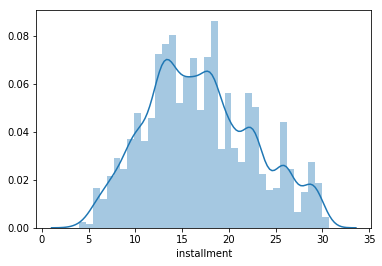

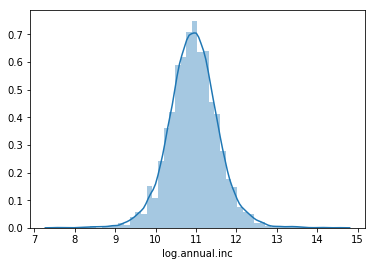

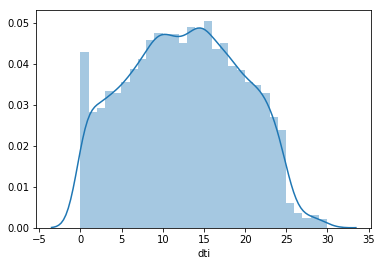

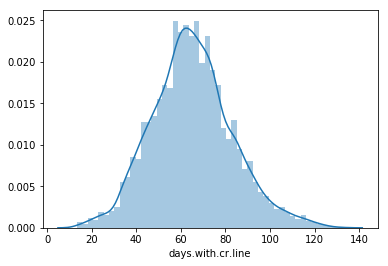

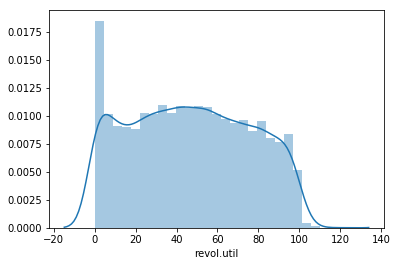

In [10]:

for col in bank_num:
    sns.distplot(bank_num[col])
    plt.show()

In [11]:
bank_cat = bank.select_dtypes("object")

In [12]:
bank_cat.head()

,customer.id,credit.policy,purpose,int.rate,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,Less than 5,Yes,Yes


In [13]:
bank_cat.drop(["customer.id","int.rate","paid.back.loan"],axis=1,inplace=True)

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
bank_cat.head()

,credit.policy,purpose,inq.last.6mths,delinq.2yrs
0,Yes,debt_consolidation,Less than 5,No
1,Yes,credit_card,Less than 5,No
2,Yes,debt_consolidation,Less than 5,No
3,Yes,debt_consolidation,Less than 5,No
4,Yes,credit_card,Less than 5,Yes


In [15]:
int_rate = bank["int.rate"].str[:-1].astype("float64")

In [16]:
int_rate.head()

0    11.89
1    10.71
2    13.57
3    10.08
4    14.26
Name: int.rate, dtype: float64

In [17]:
skew(int_rate)

0.16439416280318114

In [18]:
bank_num = pd.concat([bank_num,int_rate],axis=1)

In [19]:
bank_num.head(5)

,installment,log.annual.inc,dti,days.with.cr.line,revol.util,int.rate
0,28.794097,11.350407,19.48,75.099656,52.1,11.89
1,15.106952,11.082143,14.29,52.535702,76.7,10.71
2,19.153590,10.373491,11.63,68.629440,25.6,13.57
3,12.741272,11.350407,8.10,51.961123,73.2,10.08
4,10.144949,11.299732,14.97,63.765194,39.5,14.26


In [20]:
bank_cat.head()

,credit.policy,purpose,inq.last.6mths,delinq.2yrs
0,Yes,debt_consolidation,Less than 5,No
1,Yes,credit_card,Less than 5,No
2,Yes,debt_consolidation,Less than 5,No
3,Yes,debt_consolidation,Less than 5,No
4,Yes,credit_card,Less than 5,Yes


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
for col in bank_cat:
    bank_cat[col] = le.fit_transform(bank_cat[col])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
bank_cat.head()

,credit.policy,purpose,inq.last.6mths,delinq.2yrs
0,1,2,3,0
1,1,1,3,0
2,1,2,3,0
3,1,2,3,0
4,1,1,3,1


In [25]:
bank_new = pd.concat([bank_num,bank_cat],axis=1)

In [26]:
bank_new.head()

,installment,log.annual.inc,dti,days.with.cr.line,revol.util,int.rate,credit.policy,purpose,inq.last.6mths,delinq.2yrs
0,28.794097,11.350407,19.48,75.099656,52.1,11.89,1,2,3,0
1,15.106952,11.082143,14.29,52.535702,76.7,10.71,1,1,3,0
2,19.153590,10.373491,11.63,68.629440,25.6,13.57,1,2,3,0
3,12.741272,11.350407,8.10,51.961123,73.2,10.08,1,2,3,0
4,10.144949,11.299732,14.97,63.765194,39.5,14.26,1,1,3,1


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()

In [29]:
X = pd.DataFrame(ss.fit_transform(bank_new), columns=list(bank_new.columns))

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
X.head()

,installment,log.annual.inc,dti,days.with.cr.line,revol.util,int.rate,credit.policy,purpose,inq.last.6mths,delinq.2yrs
0,2.068832,0.680388,0.998505,0.554080,0.182704,-0.139318,0.492222,0.033176,0.290033,-0.363894
1,-0.314902,0.244031,0.244540,-0.690530,1.030602,-0.578868,0.492222,-0.559665,0.290033,-0.363894
2,0.389855,-0.908659,-0.141885,0.197188,-0.730683,0.486484,0.492222,0.033176,0.290033,-0.363894
3,-0.726905,0.680388,-0.654697,-0.722224,0.909966,-0.813544,0.492222,0.033176,0.290033,-0.363894
4,-1.179077,0.597961,0.343326,-0.071120,-0.251586,0.743509,0.492222,-0.559665,0.290033,2.748051


In [31]:
y = bank["paid.back.loan"]

In [32]:
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: paid.back.loan, dtype: object

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

In [34]:
from sklearn import tree

In [35]:
dt2 = tree.DecisionTreeClassifier(min_samples_leaf=100)

dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
dt2.score(X_test,y_test)

0.8395963813500348

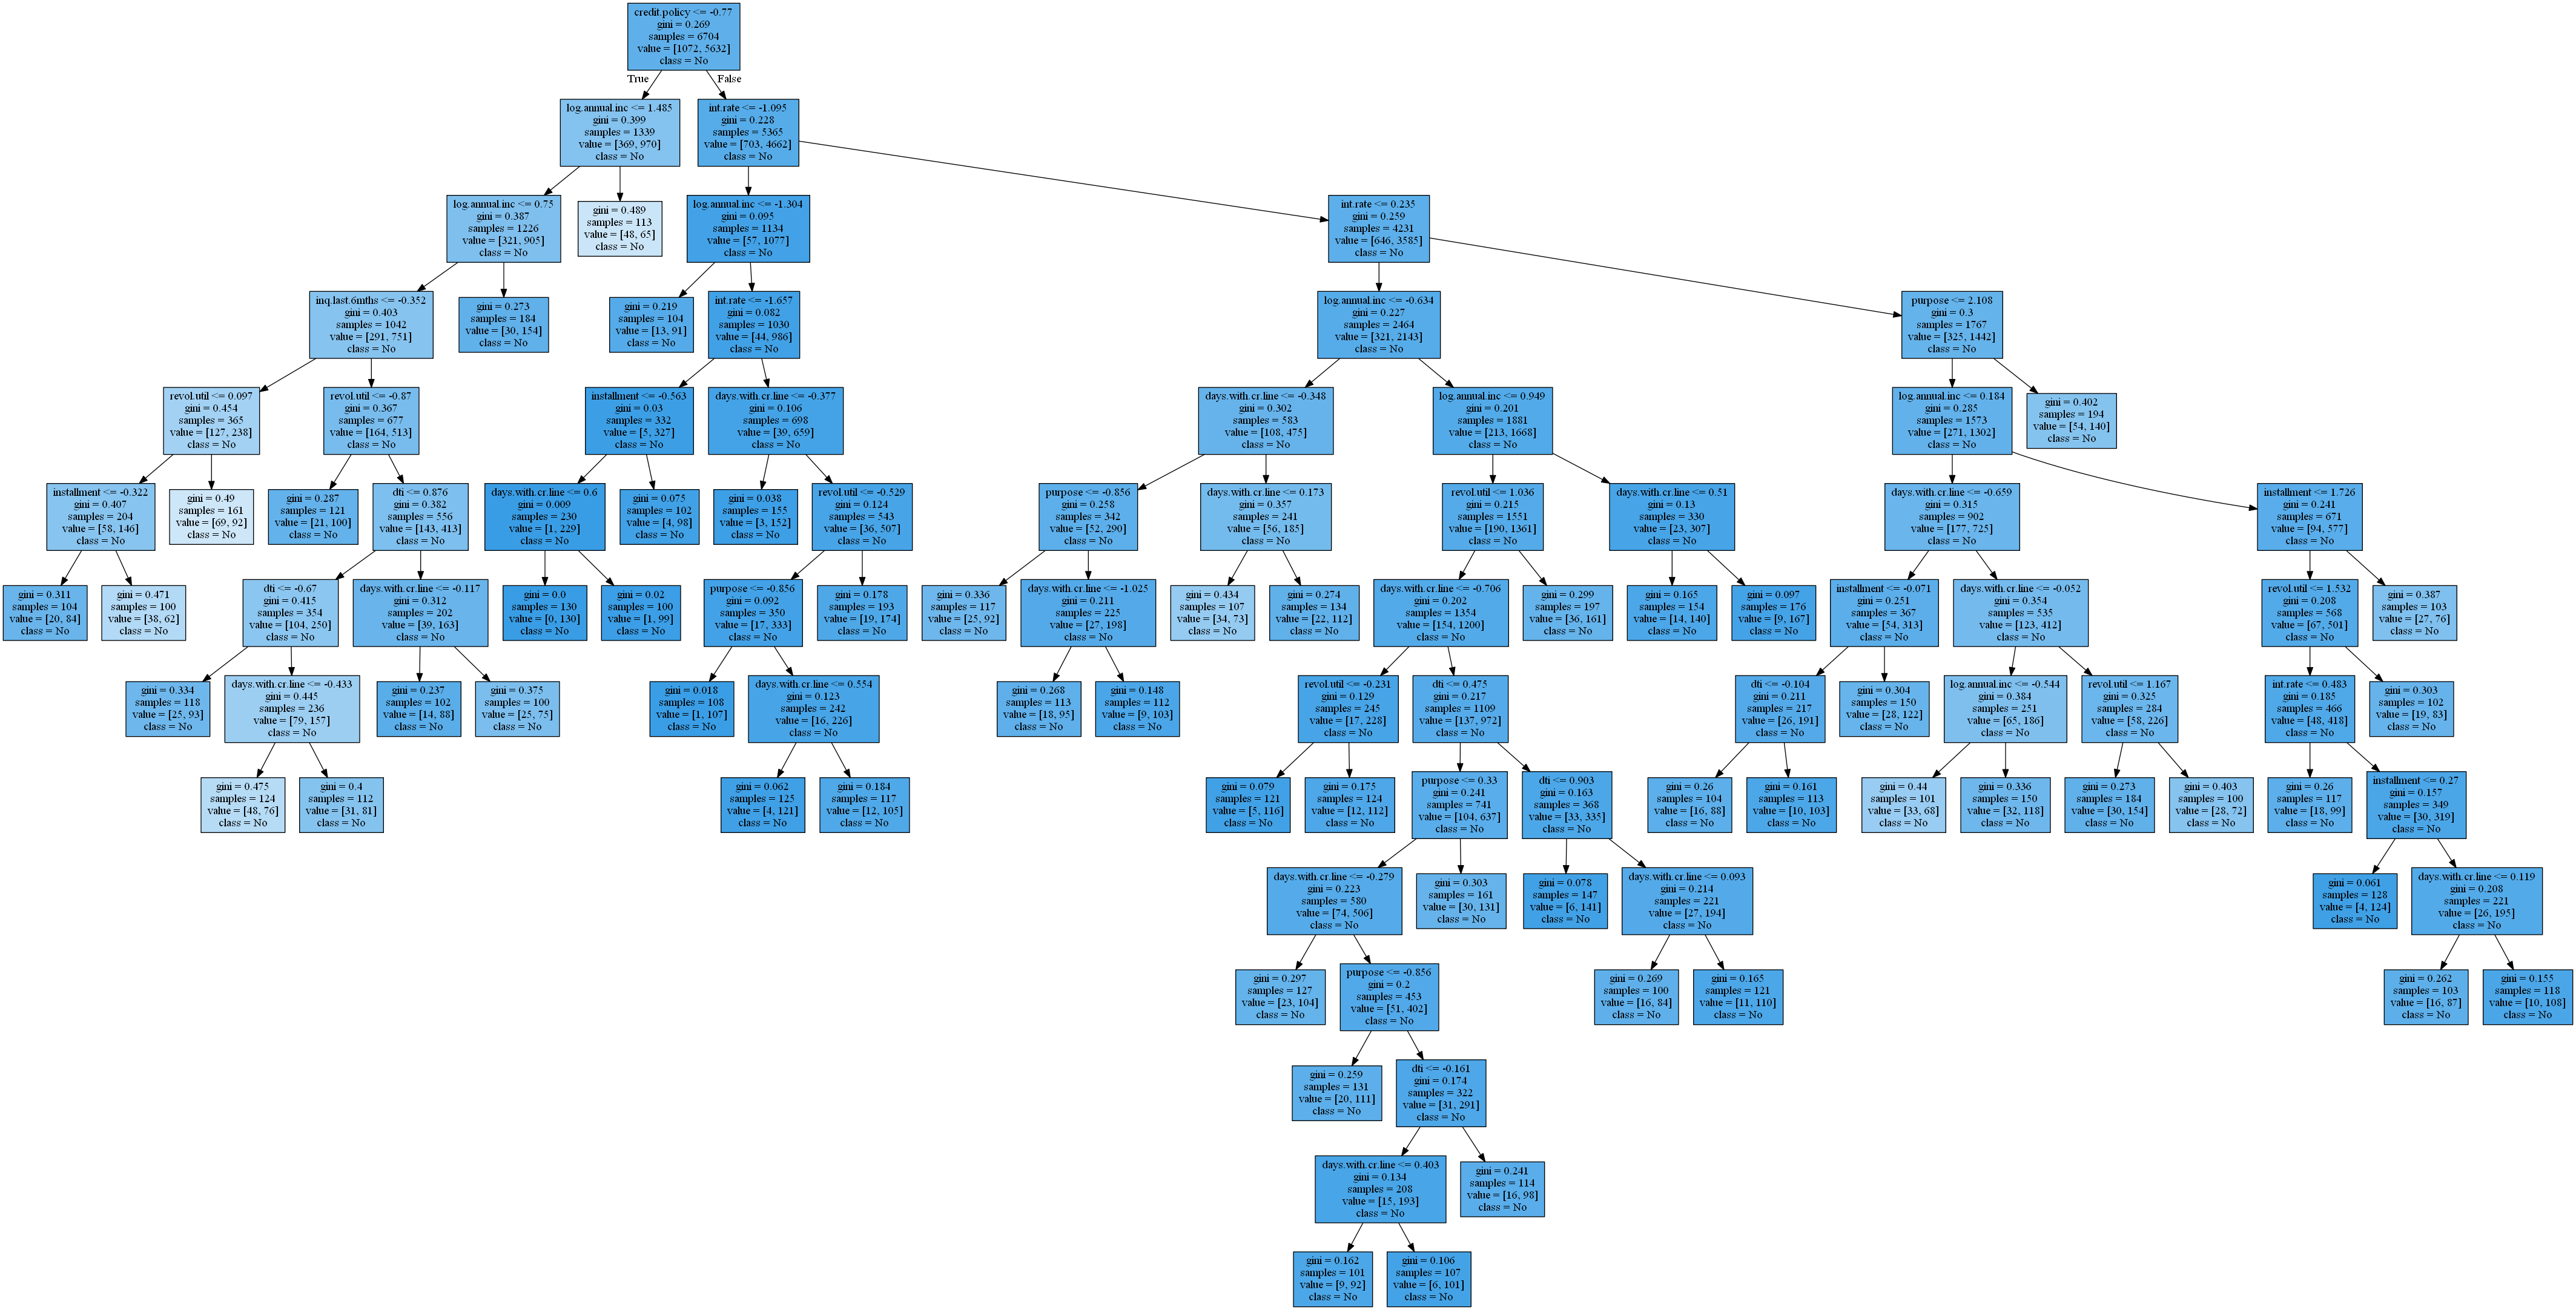

In [37]:
from IPython.display import Image
import pydotplus


# Create DOT data for visualizing the tree
dot_data = tree.export_graphviz(dt2, out_file=None,
                                feature_names=X.columns, filled = True,  
                                class_names=["Yes","No"])

# Draw graph
graph_small = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph_small.create_png())

In [38]:
import graphviz

columns=list(X.columns)
dot_data = tree.export_graphviz(dt2,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("class.txt","w+")
f.write(dot_data)
f.close()

In [ ]:
# pip install pydotplus
# conda install graphviz
# store graphviz path in env variables